In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os


def return_file_path(base_dir, patient, image):


    patient = 'sample_' + patient
    return os.path.join(base_dir, patient, image)

# Paths to your images
patient = '0000'

warped_moving_path = return_file_path('/home/xcwu/registration/baseline_l100_k10_cmldice', patient, 'fdg_pt_warped.nii.gz')
warped_moving_mask_path = return_file_path('/home/xcwu/registration/baseline_l100_k10_cmldice', patient, 'fdg_mask_warped.nii.gz')
fixed_path = return_file_path('/home/xcwu/registration/baseline_l100_k10_cmldice', patient, 'psma_pt.nii.gz')
fixed_mask_path = return_file_path('/home/xcwu/registration/baseline_l100_k10_cmldice', patient, 'psma_ct_mask.nii.gz')

# Read ITK images
warped_moving_img = sitk.ReadImage(warped_moving_path)
warped_moving_mask_img = sitk.ReadImage(warped_moving_mask_path)
fixed_img = sitk.ReadImage(fixed_path)
fixed_mask_img = sitk.ReadImage(fixed_mask_path)

# Convert to NumPy arrays (z, y, x)
warped_moving = sitk.GetArrayFromImage(warped_moving_img)
warped_moving_mask = sitk.GetArrayFromImage(warped_moving_mask_img)
fixed = sitk.GetArrayFromImage(fixed_img)
fixed_mask = sitk.GetArrayFromImage(fixed_mask_img)

print("Image shape (z, y, x):", fixed.shape)


Image shape (z, y, x): (384, 128, 128)


In [2]:
# Choose slice index (along z)
slice_idx = fixed.shape[1] // 2  # middle slice

wm_slice = warped_moving[:, slice_idx, :]
wm_mask_slice = warped_moving_mask[:, slice_idx, :]
fixed_slice = fixed[:, slice_idx, :]
fixed_mask_slice = fixed_mask[:, slice_idx, :]


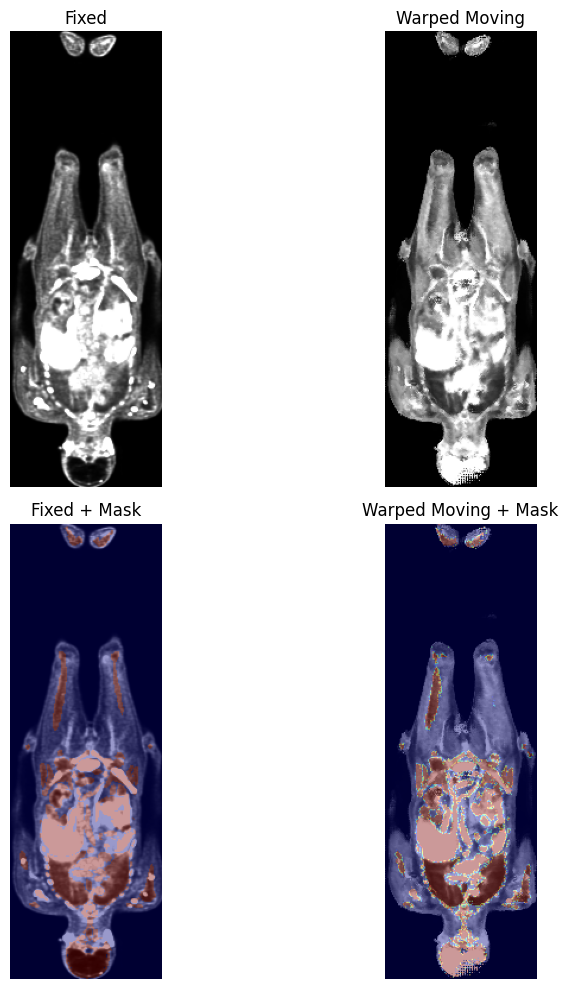

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(fixed_slice, cmap="gray")
axes[0, 0].set_title("Fixed")
axes[0, 0].axis("off")

axes[1, 0].imshow(fixed_slice, cmap="gray")
axes[1, 0].imshow(fixed_mask_slice, cmap="jet", alpha=0.4)
axes[1, 0].set_title("Fixed + Mask")
axes[1, 0].axis("off")

axes[0, 1].imshow(wm_slice, cmap="gray")
axes[0, 1].set_title("Warped Moving")
axes[0, 1].axis("off")

axes[1, 1].imshow(wm_slice, cmap="gray")
axes[1, 1].imshow(wm_mask_slice, cmap="jet", alpha=0.4)
axes[1, 1].set_title("Warped Moving + Mask")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()
